In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Función para aplicar erosión
def erosion(img, kernel):
    return cv2.erode(img, kernel, iterations=1)

# Función para aplicar dilatación
def dilatation(img, kernel):
    return cv2.dilate(img, kernel, iterations=1)

# Función para aplicar apertura (erosión seguida de dilatación)
def apertura(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Función para aplicar cierre (dilatación seguida de erosión)
def cierre(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Función para calcular borde morfológico
def borde_morfologico(img, kernel):
    dilatada = cv2.dilate(img, kernel, iterations=1)
    erosionada = cv2.erode(img, kernel, iterations=1)
    return dilatada - img, img - erosionada, dilatada - erosionada

# Función para filtro de mediana
def filtro_mediana(img):
    return cv2.medianBlur(img, 3)

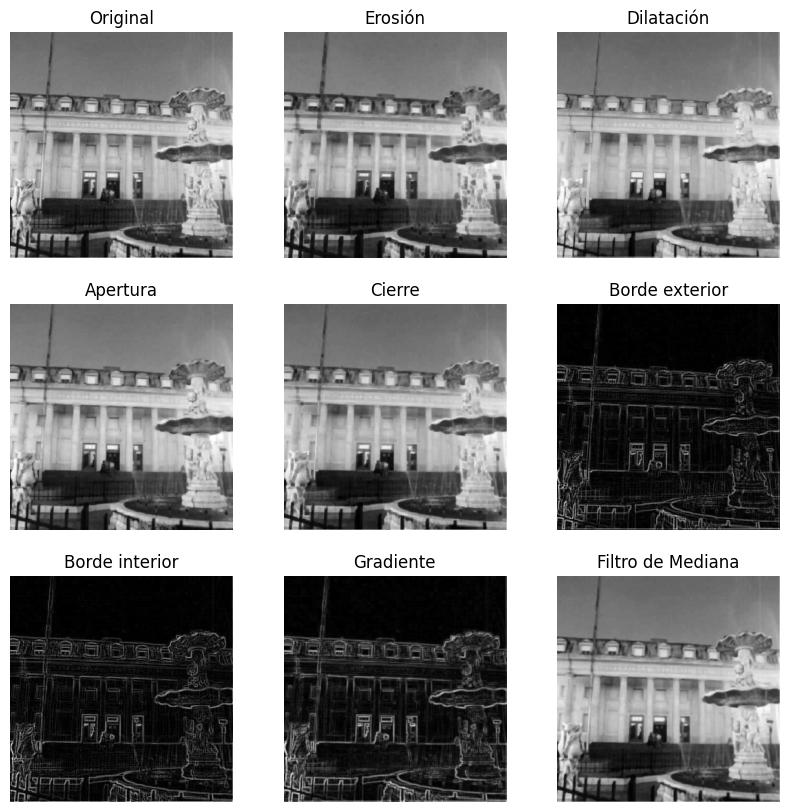

In [5]:
# Función principal para mostrar la imagen y aplicar los filtros
def procesar_imagen(ruta_imagen):
    # Cargar la imagen en niveles de gris
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    
    # Definir un kernel 3x3
    kernel = np.ones((3, 3), np.uint8)
    
    # Aplicar filtros
    erosionada = erosion(img, kernel)
    dilatada = dilatation(img, kernel)
    apertura_img = apertura(img, kernel)
    cierre_img = cierre(img, kernel)
    borde_ext, borde_int, gradiente = borde_morfologico(img, kernel)
    mediana_img = filtro_mediana(img)
    
    # Encontre esta forma de mostrar que me gusta bastante y queda muy comoda
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    axs[0, 0].imshow(img, cmap='gray')
    axs[0, 0].set_title('Original')

    axs[0, 1].imshow(erosionada, cmap='gray')
    axs[0, 1].set_title('Erosión')

    axs[0, 2].imshow(dilatada, cmap='gray')
    axs[0, 2].set_title('Dilatación')

    axs[1, 0].imshow(apertura_img, cmap='gray')
    axs[1, 0].set_title('Apertura')

    axs[1, 1].imshow(cierre_img, cmap='gray')
    axs[1, 1].set_title('Cierre')

    axs[1, 2].imshow(borde_ext, cmap='gray')
    axs[1, 2].set_title('Borde exterior')

    axs[2, 0].imshow(borde_int, cmap='gray')
    axs[2, 0].set_title('Borde interior')

    axs[2, 1].imshow(gradiente, cmap='gray')
    axs[2, 1].set_title('Gradiente')

    axs[2, 2].imshow(mediana_img, cmap='gray')
    axs[2, 2].set_title('Filtro de Mediana')

    for ax in axs.flat:
        ax.axis('off')
    
    plt.show()

# Ejecutar con una imagen de ejemplo
procesar_imagen('fuente.bmp')